In [28]:
# import pandas library 
import pandas as pd 

# Get the data 
column_names = ['user_id', 'item_id', 'rating', 'timestamp'] 

path = 'https://media.geeksforgeeks.org/wp-content/uploads/file.tsv'

df = pd.read_csv(path, sep='\t', names=column_names) 

# Check the head of the data 
df.head() 


,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [29]:
# Check out all the movies and their respective IDs 
movie_titles = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/Movie_Id_Titles.csv') 
movie_titles.head() 


,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [30]:
data = pd.merge(df, movie_titles, on='item_id') 
data.head() 


,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [31]:
# Calculate mean rating of all movies 
data.groupby('title')['rating'].mean().sort_values(ascending=False).head() 


title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [32]:
# Calculate count rating of all movies 
data.groupby('title')['rating'].count().sort_values(ascending=False).head() 


title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [33]:
# creating dataframe with 'rating' count values 
ratings = pd.DataFrame(data.groupby('title')['rating'].mean()) 

ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count()) 

ratings.head() 


,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [34]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style('white') 
%matplotlib inline 


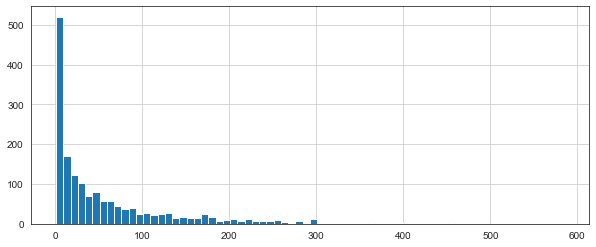

In [35]:
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 

ratings['num of ratings'].hist(bins = 70) 


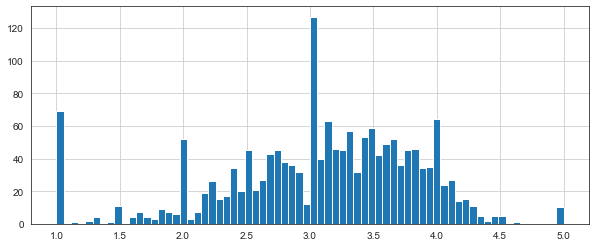

In [36]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 

ratings['rating'].hist(bins = 70) 


In [37]:
# Sorting values according to 
# the 'num of rating column' 
moviemat = data.pivot_table(index ='user_id', columns ='title', values ='rating') 

moviemat.head() 

ratings.sort_values('num of ratings', ascending = False).head(10) 


,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [38]:
# analysing correlation with similar movies 
starwars_user_ratings = moviemat['Star Wars (1977)'] 
liarliar_user_ratings = moviemat['Liar Liar (1997)'] 

starwars_user_ratings.head() 


user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [39]:
# analysing correlation with similar movies 
similar_to_starwars = moviemat.corrwith(starwars_user_ratings) 
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings) 

corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation']) 
corr_starwars.dropna(inplace = True) 

corr_starwars.head() 


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [40]:
# Similar movies like starwars 
corr_starwars.sort_values('Correlation', ascending = False).head(10) 
corr_starwars = corr_starwars.join(ratings['num of ratings']) 

corr_starwars.head() 

corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head() 


,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [41]:
# Similar movies as of liarliar 
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation']) 
corr_liarliar.dropna(inplace = True) 

corr_liarliar = corr_liarliar.join(ratings['num of ratings']) 
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head() 



,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


## Recomender Systems (item based similarity)

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/Users/macbook/Documents/Data_Science/ML_DL/Data_Sets/ml-latest-small/ratings.csv")

In [3]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movie_titles = pd.read_csv('/Users/macbook/Documents/Data_Science/ML_DL/Data_Sets/ml-latest-small/movies.csv')
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# Since movieid columns are same so we can merge these datasets onto same columns 
df = pd.merge(df,movie_titles,on='movieId')

In [6]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [7]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [8]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [9]:
ratings['number_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head(10)

,rating,number_of_ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


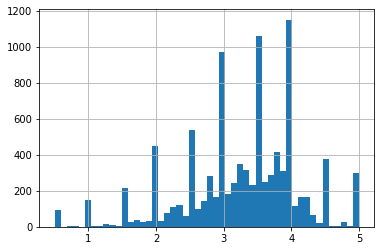

In [10]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline
ratings['rating'].hist(bins=50)

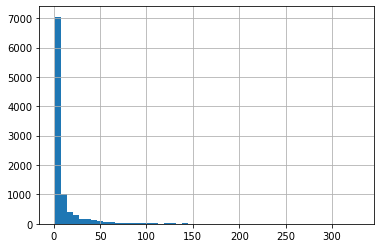

In [11]:
ratings['number_of_ratings'].hist(bins=50)

sns.jointplot(x='rating',y='number_of_ratings',data=ratings)

In [12]:
#pd.set_option('display.height',1000)
pd.set_option('display.width',1000)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [13]:
movie_matrix = df.pivot_table(index='userId',columns = ['title'],values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),127 Hours (2010),13 Assassins (Jûsan-nin no shikaku) (2010),13 Ghosts (1960),13 Going on 30 (2004),13 Hours (2016),13 Sins (2014),13 Tzameti (2005),13th (2016),"13th Warrior, The (1999)",1408 (2007),1492: Conquest of Paradise (1992),15 Minutes (2001),16 Blocks (2006),17 Again (2009),1776 (1972),18 Again! (1988),187 (One Eight Seven) (1997),1900 (Novecento) (1976),1941 (1979),1969 (1988),1984 (Nineteen Eighty-Four) (1984),2 Days in New York (2012),2 Days in Paris (2007),2 Days in the Valley (1996),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",2 Guns (2013),20 Dates (1998),20 Feet from Stardom (Twenty Feet from Stardom) (2013),20 Million Miles to Earth (1957),"20,000 Days on Earth (2014)","20,000 Leagues Under the Sea (1916)","20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001 Maniacs (2005),2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),2012 (2009),2046 (2004),2048: Nowhere to Run (2017),21 (2008),21 Grams (2003),21 Jump Street (2012),21 Up (1977),21 and Over (2013),22 Jump Street (2014),24 Hour Party People (2002),25th Hour (2002),27 Dresses (2008),28 Days (2000),28 Days Later (2002),28 Up (1985),28 Weeks Later (2007),3 Days to Kill (2014),3 Extremes (Three... Extremes) (Saam gaang yi) (2004),3 Idiots (2009),3 Ninjas (1992),3 Ninjas Kick Back (1994),3 Ninjas Knuckle Up (1995),3 Ninjas: High Noon On Mega Mountain (1998),3 Women (Three Women) (1977),3 dev adam (Three Giant Men) (1973),3-Iron (Bin-jip) (2004),30 Days of Night (2007),30 Minutes or Less (2011),300 (2007),3000 Miles to Graceland (2001),300: Rise of an Empire (2014),31 (2016),35 Up (1991),"39 Steps, The (1935)",3:10 to Yuma (1957),3:10 to Yuma (2007),4 Little Girls (1997),"4 Months, 3 Weeks and 2 Days (4 luni, 3 saptamâni si 2 zile) (2007)",40 Days and 40 Nights (2002),"40-Year-Old Virgin, The (2005)","400 Blows, The (Les quatre cents coups) (1959)",42 (2013),42 Up (1998),42nd Street (1933),47 Ronin (2013),48 Hrs. (1982),49 Up (2005),5 Centimeters per Second (Byôsoku 5 senchimêtoru) (2007),5 to 7 (2014),"5,000 Fingers of Dr. T, The (1953)",50 First Dates (2004),50/50 (2011),52 Pick-Up (1986),54 (1998),6 Days to Air: The Making of South Park (2011),61* (2001),"6th Day, The (2000)","6th Man, The (Sixth Man, The) (1997)",7 Days in Hell (2015),7 Faces of Dr. Lao (1964),"7th Voyage of Sinbad, The (1958)",8 1/2 (8½) (1963),8 Heads in a Duffel Bag (1997),8 Mile (2002),8 Seconds (1994),8 Women (2002),8 ½ Women (a.k.a. 8 1/2 Women) (a.k.a. Eight and a Half Women) (1999),800 Bullets (800 Balas) (2002),84 Charing Cross Road (1987),8MM (1999),9 (2009),9 1/2 Weeks (Nine 1/2 Weeks) (1986),9/11 (2002),96 Minutes (2011),964 Pinocchio (1991),99 francs (2007),9to5: Days in Porn (a.k.a. 9 to 5: Days in Porn) (2008),A Bad Moms Christmas (2017),A Christmas Story Live! (2017),A Cosmic Christmas (1977),A Detective Story (2003),A Dog's Purpose (2017),A Flintstones Christmas Carol (1994),A German Life (2016),A Home at the End of the World 

In [14]:
ratings.sort_values('number_of_ratings',ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [15]:
AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']

In [16]:
AFO_user_rating.head(10),contact_user_rating.head(10)

(userId
 1    NaN
 2    NaN
 3    NaN
 4    NaN
 5    NaN
 6    NaN
 7    NaN
 8    NaN
 9    NaN
 10   NaN
 Name: Air Force One (1997), dtype: float64, userId
 1     NaN
 2     NaN
 3     NaN
 4     NaN
 5     NaN
 6     NaN
 7     5.0
 8     NaN
 9     NaN
 10    NaN
 Name: Contact (1997), dtype: float64)

In [17]:
similar_to_air_force_one = movie_matrix.corrwith(AFO_user_rating)
similar_to_air_force_one.head(20)

title
'71 (2014)                                          NaN
'Hellboy': The Seeds of Creation (2004)             NaN
'Round Midnight (1986)                              NaN
'Salem's Lot (2004)                                 NaN
'Til There Was You (1997)                           NaN
'Tis the Season for Love (2015)                     NaN
'burbs, The (1989)                             0.168459
'night Mother (1986)                                NaN
(500) Days of Summer (2009)                    0.086874
*batteries not included (1987)                -0.866025
...All the Marbles (1981)                           NaN
...And Justice for All (1979)                       NaN
00 Schneider - Jagd auf Nihil Baxter (1994)         NaN
1-900 (06) (1994)                                   NaN
10 (1979)                                           NaN
10 Cent Pistol (2015)                               NaN
10 Cloverfield Lane (2016)                     0.192450
10 Items or Less (2006)                   

In [18]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)
similar_to_contact.head(30)

title
'71 (2014)                                                     NaN
'Hellboy': The Seeds of Creation (2004)                        NaN
'Round Midnight (1986)                                         NaN
'Salem's Lot (2004)                                            NaN
'Til There Was You (1997)                                      NaN
'Tis the Season for Love (2015)                                NaN
'burbs, The (1989)                                        0.486761
'night Mother (1986)                                           NaN
(500) Days of Summer (2009)                               0.634064
*batteries not included (1987)                            0.868599
...All the Marbles (1981)                                      NaN
...And Justice for All (1979)                             1.000000
00 Schneider - Jagd auf Nihil Baxter (1994)                    NaN
1-900 (06) (1994)                                              NaN
10 (1979)                                               

In [19]:
corr_afo = pd.DataFrame(similar_to_air_force_one,columns=['Correlation'])
corr_afo.dropna(inplace=True)
corr_afo.head(20)

,Correlation
title,
"'burbs, The (1989)",0.168459
(500) Days of Summer (2009),0.086874
*batteries not included (1987),-0.866025
10 Cloverfield Lane (2016),0.192450
10 Items or Less (2006),-1.000000
10 Things I Hate About You (1999),-0.198731
"10,000 BC (2008)",0.478612
101 Dalmatians (1996),0.014306
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.178516


In [20]:
corr_contact = pd.DataFrame(similar_to_contact,columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head(20)

,Correlation
title,
"'burbs, The (1989)",0.486761
(500) Days of Summer (2009),0.634064
*batteries not included (1987),0.868599
...And Justice for All (1979),1.000000
10 Things I Hate About You (1999),-0.102640
"10,000 BC (2008)",-0.212431
101 Dalmatians (1996),0.327327
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.224338
12 Angry Men (1957),0.069711


In [21]:
corr_afo = corr_afo.join(ratings['number_of_ratings'])
corr_contact = corr_contact.join(ratings['number_of_ratings'])


In [22]:
corr_afo.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.168459,17
(500) Days of Summer (2009),0.086874,42
*batteries not included (1987),-0.866025,7
10 Cloverfield Lane (2016),0.192450,14
10 Items or Less (2006),-1.000000,3


In [24]:
corr_contact.head(20)

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.486761,17
(500) Days of Summer (2009),0.634064,42
*batteries not included (1987),0.868599,7
...And Justice for All (1979),1.000000,3
10 Things I Hate About You (1999),-0.102640,54
"10,000 BC (2008)",-0.212431,17
101 Dalmatians (1996),0.327327,47
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.224338,44
12 Angry Men (1957),0.069711,57


In [26]:
corr_afo[corr_afo['number_of_ratings'] > 100].sort_values(by='Correlation',ascending=False).head(20)

,Correlation,number_of_ratings
title,,
Clear and Present Danger (1994),0.698836,110
"Net, The (1995)",0.598322,112
"Green Mile, The (1999)",0.574799,111
"Firm, The (1993)",0.561304,101
"Departed, The (2006)",0.543279,107
Apollo 13 (1995),0.536136,201
Twister (1996),0.511892,123
American Pie (1999),0.501064,103
"Truman Show, The (1998)",0.500529,125


In [27]:
corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation',ascending=False).head(20)

,Correlation,number_of_ratings
title,,
Sleepless in Seattle (1993),0.689602,106
American Pie (1999),0.670109,103
Clear and Present Danger (1994),0.641203,110
"Firm, The (1993)",0.640332,101
"Bourne Identity, The (2002)",0.639769,112
Outbreak (1995),0.586934,101
E.T. the Extra-Terrestrial (1982),0.569043,122
Apollo 13 (1995),0.563138,201
Die Hard: With a Vengeance (1995),0.552904,144
